## Import

In [1053]:
from types import NoneType

import pandas as pd
import numpy as np
import seaborn as sns

df = pd.read_csv('covid_combined_data.csv')
df['date'] = pd.to_datetime(df['date'])
df['Q'] = df['date'].dt.to_period('Q').astype(str)
countries_df = pd.read_csv('countries_combined_data.csv')
print(df['country_name'].unique())

['Austria' 'Italy' 'Poland' 'United Kingdom' 'Argentina' 'Brazil' 'India'
 'France' 'Switzerland' 'Malaysia' 'United States of America' 'Australia'
 'Bosnia and Herzegovina' 'Ecuador' 'Paraguay' 'Israel' 'Malta' 'Mexico'
 'South Korea' 'Slovakia' 'Zimbabwe' 'Indonesia' 'Japan'
 'Trinidad and Tobago' 'Liechtenstein' 'Latvia' 'Pakistan' 'Greece'
 'Kuwait' 'Slovenia' 'Norway' 'Colombia' 'Denmark' 'Panama' 'Albania'
 'Belgium' 'Ireland' 'Serbia' 'Canada' 'Cuba' 'Rwanda' 'Saudi Arabia'
 'Bolivia' 'Morocco' 'Iceland' 'Turkey' 'Czech Republic' 'Armenia'
 'Bangladesh' 'Ukraine' 'Nepal' 'Estonia' 'Thailand' 'Azerbaijan'
 'Georgia' 'Croatia' 'Guatemala' 'Netherlands' 'Uruguay' 'Jordan' 'Taiwan'
 'United Arab Emirates' 'Bulgaria' 'Cambodia' 'Finland' 'South Africa'
 'Bahrain' 'Saint Kitts and Nevis' 'Qatar' 'Cyprus' 'Senegal' 'Suriname'
 'Laos' 'Jamaica' 'Lithuania' 'Dominican Republic' 'Sweden' 'Russia'
 'Tunisia' 'Hungary' 'Maldives' 'New Zealand' 'Portugal' 'Gabon'
 'Sri Lanka' 'Luxembourg' 'Z

In [1054]:
df.head()

,location_key,subregion1_code_x,subregion1_name_x,date,country_name_x,new_confirmed,cumulative_confirmed,new_tested,cumulative_tested,subregion1_code_y,...,subregion1_code,subregion1_name,country_name,new_persons_vaccinated,cumulative_persons_vaccinated,new_persons_fully_vaccinated,cumulative_persons_fully_vaccinated,new_vaccine_doses_administered,cumulative_vaccine_doses_administered,Q
0,AR_U,U,Chubut,2021-06-03,Argentina,352,65456,647,127262,U,...,U,Chubut,Argentina,1157,54564,413,18606,1570,73170,2021Q2
1,IN_AS,AS,Assam,2021-06-25,India,2793,496481,139105,14339556,AS,...,AS,Assam,India,158705,5536768,17540,1152586,176245,6689354,2021Q2
2,MY_02,02,Kedah,2022-01-24,Malaysia,395,174374,8098,1321133,02,...,02,Kedah,Malaysia,74,1596945,257,1577276,8236,3714419,2022Q1
3,US_DE,DE,Delaware,2021-11-04,United States of America,276,145284,1121,433596,DE,...,DE,Delaware,United States of America,282,676753,119,585615,190,1323940,2021Q4
4,FR_PAC,PAC,Provence-Alpes-Côte d'Azur,2021-11-05,France,865,757955,37314,16882909,PAC,...,PAC,Provence-Alpes-Côte d'Azur,France,2486,3635163,3321,3526206,5807,7161369,2021Q4


In [1055]:
df.describe()
df['subregion1_code_x'].isna().sum()

25420

In [1056]:
countries_df.head()

,location_key_x,subregion1_code_x,subregion1_name_x,country_code,country_name,iso_3166_1_alpha_2,iso_3166_1_alpha_3,population,population_male,population_female,...,gdp_2007,gdp_2008,gdp_2009,gdp_2010,gdp_2011,gdp_2012,gdp_2013,gdp_2014,gdp_2015,gdp_2016
0,BW,NaN,NaN,BW,Botswana,BW,BWA,2351625,1139099,1212526,...,1.093905e+10,1.094507e+10,1.026713e+10,1.278665e+10,1.568293e+10,1.468628e+10,1.491578e+10,1.625945e+10,1.443057e+10,1.558114e+10
1,EC,NaN,NaN,EC,Ecuador,EC,ECU,17643060,8823827,8819233,...,5.100778e+10,6.176264e+10,6.251969e+10,6.955537e+10,7.927666e+10,8.792454e+10,9.512966e+10,1.017263e+11,9.929038e+10,9.861397e+10
2,GQ,NaN,NaN,GQ,Equatorial Guinea,GQ,GNQ,1402985,780380,622605,...,1.307172e+10,1.974989e+10,1.502780e+10,1.629854e+10,2.132940e+10,2.238963e+10,2.194260e+10,2.173650e+10,1.259721e+10,1.068480e+10
3,GY,NaN,NaN,GY,Guyana,GY,GUY,786559,395549,391010,...,1.740335e+09,1.922598e+09,2.061324e+09,2.273225e+09,2.576024e+09,2.861562e+09,2.987684e+09,3.077643e+09,3.197225e+09,3.502397e+09
4,IT,NaN,NaN,IT,Italy,IT,ITA,60359546,29384766,30974780,...,2.203053e+12,2.390729e+12,2.185160e+12,2.125058e+12,2.276292e+12,2.072823e+12,2.130491e+12,2.151733e+12,1.832347e+12,1.858913e+12


In [1057]:
countries_df.describe()

,subregion1_code_x,subregion1_name_x,population,population_male,population_female,population_density_x,human_development_index,gdp_usd,gdp_per_capita_usd,latitude,...,gdp_2007,gdp_2008,gdp_2009,gdp_2010,gdp_2011,gdp_2012,gdp_2013,gdp_2014,gdp_2015,gdp_2016
count,0.0,0.0,1.370000e+02,1.370000e+02,1.370000e+02,137.000000,137.000000,1.370000e+02,137.000000,137.000000,...,1.370000e+02,1.370000e+02,1.370000e+02,1.370000e+02,1.370000e+02,1.370000e+02,1.370000e+02,1.370000e+02,1.370000e+02,1.360000e+02
mean,NaN,NaN,4.739199e+07,2.399633e+07,2.337054e+07,239.992328,0.715438,4.324655e+11,15769.686131,17.835316,...,2.804792e+11,3.150346e+11,2.982958e+11,3.304192e+11,3.734704e+11,3.778555e+11,3.879545e+11,3.978471e+11,3.678356e+11,3.745047e+11
std,NaN,NaN,1.725282e+08,8.893505e+07,8.361013e+07,763.884667,0.152899,1.408638e+12,20401.665167,25.185132,...,7.114949e+11,7.966928e+11,7.910842e+11,8.735504e+11,1.000325e+12,1.044687e+12,1.079501e+12,1.135234e+12,1.127300e+12,1.155853e+12
min,NaN,NaN,7.199100e+04,3.504100e+04,3.629800e+04,2.110000,0.354000,5.960333e+08,261.000000,-41.200000,...,4.213759e+08,4.581902e+08,4.890743e+08,4.938244e+08,5.010253e+08,4.859980e+08,5.019793e+08,5.236663e+08,5.350958e+08,5.814840e+08
25%,NaN,NaN,2.961161e+06,1.606609e+06,1.498593e+06,25.759000,0.591000,1.418044e+10,2229.000000,1.300000,...,7.880509e+09,8.496966e+09,8.621574e+09,1.000367e+10,1.151839e+10,1.229277e+10,1.258212e+10,1.278608e+10,1.169229e+10,1.101091e+10
50%,NaN,NaN,1.023018e+07,5.165979e+06,5.096935e+06,91.000000,0.741000,5.604591e+10,6977.000000,17.000000,...,2.674387e+10,3.186255e+10,3.547712e+10,3.841963e+10,4.226270e+10,4.386857e+10,4.764821e+10,4.916577e+10,4.892188e+10,4.737364e+10
75%,NaN,NaN,3.286627e+07,1.677100e+07,1.606720e+07,213.783000,0.831000,2.823182e+11,19116.000000,38.500000,...,1.787067e+11,2.081816e+11,1.924084e+11,2.336095e+11,2.522520e+11,2.500921e+11,2.699801e+11,2.609903e+11,2.425179e+11,2.549993e+11
max,NaN,NaN,1.439324e+09,7.382473e+08,7.010764e+08,8357.633000,0.957000,1.434290e+13,116348.000000,65.000000,...,4.515265e+12,5.037908e+12,5.231383e+12,6.100620e+12,7.572554e+12,8.560547e+12,9.607224e+12,1.048237e+13,1.106467e+13,1.119915e+13


## Część 1

1. Wykonaj wykresy pudełkowe (ang.box plot), które pozwolą na graficzną identyfikację wartości odstających poprzez przedstawienie kwartyli i wartości skrajnych w danych dotyczących:

1.1. liczby nowych zachorowań

D:\DevTools\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


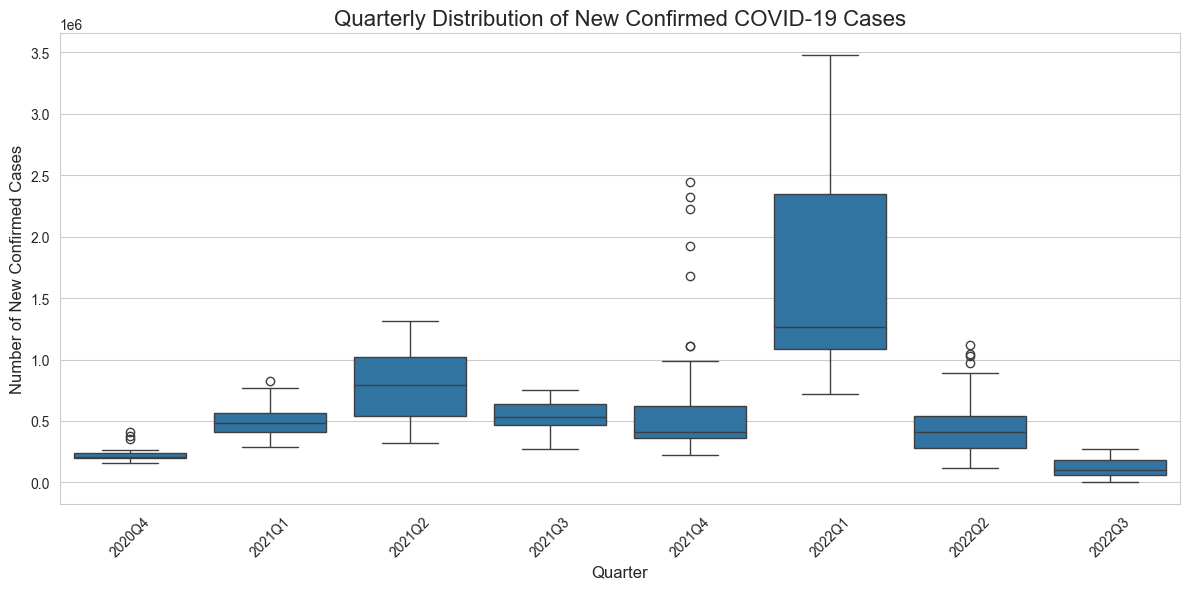

In [1058]:
import matplotlib.pyplot as plt
import seaborn as sns
confirmed_df = df.groupby('date')['new_confirmed'].sum().reset_index()
confirmed_df['Q'] = confirmed_df['date'].dt.to_period('Q').astype(str)

plt.figure(figsize=(12, 6))

sns.boxplot(x='Q', y='new_confirmed', data=confirmed_df)

plt.title('Quarterly Distribution of New Confirmed COVID-19 Cases', fontsize=16)
plt.xlabel('Quarter', fontsize=12)
plt.ylabel('Number of New Confirmed Cases', fontsize=12)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

1.2. liczby nowych śmierci



D:\DevTools\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


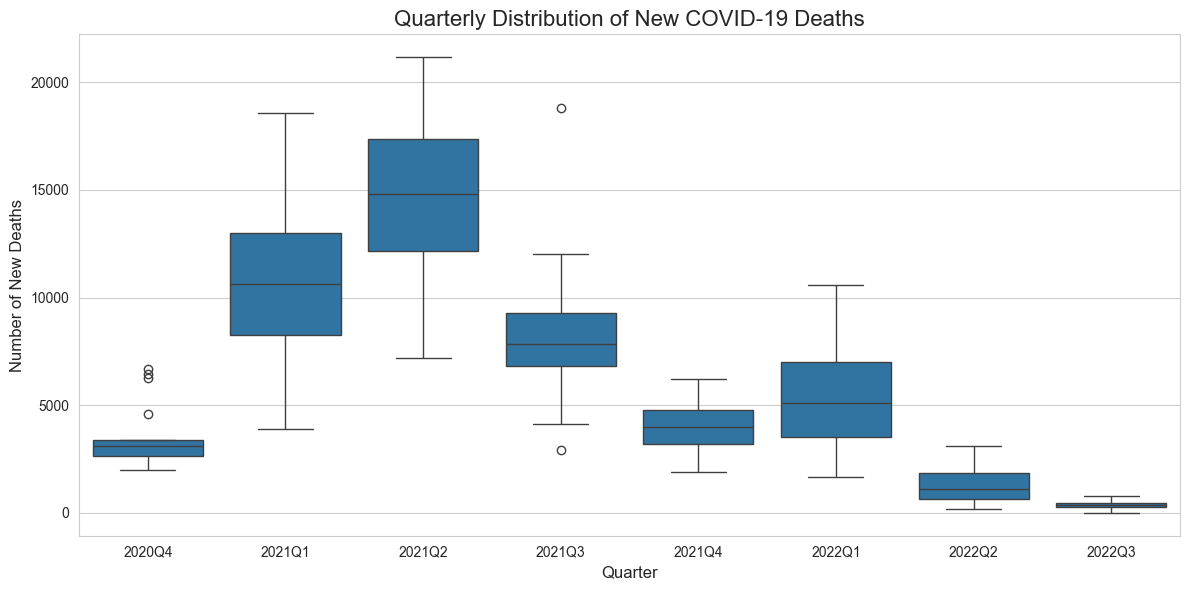

In [1059]:
deceased_df = df.groupby('date')['new_deceased'].sum().reset_index()
deceased_df['Q'] = deceased_df['date'].dt.to_period('Q').astype(str)

plt.figure(figsize=(12, 6))

sns.boxplot(x='Q', y='new_deceased', data=deceased_df)

plt.title('Quarterly Distribution of New COVID-19 Deaths', fontsize=16)
plt.xlabel('Quarter', fontsize=12)
plt.ylabel('Number of New Deaths', fontsize=12)

plt.tight_layout()
plt.show()

1.3. liczby nowych szczepień



<Axes: xlabel='Q', ylabel='Count'>

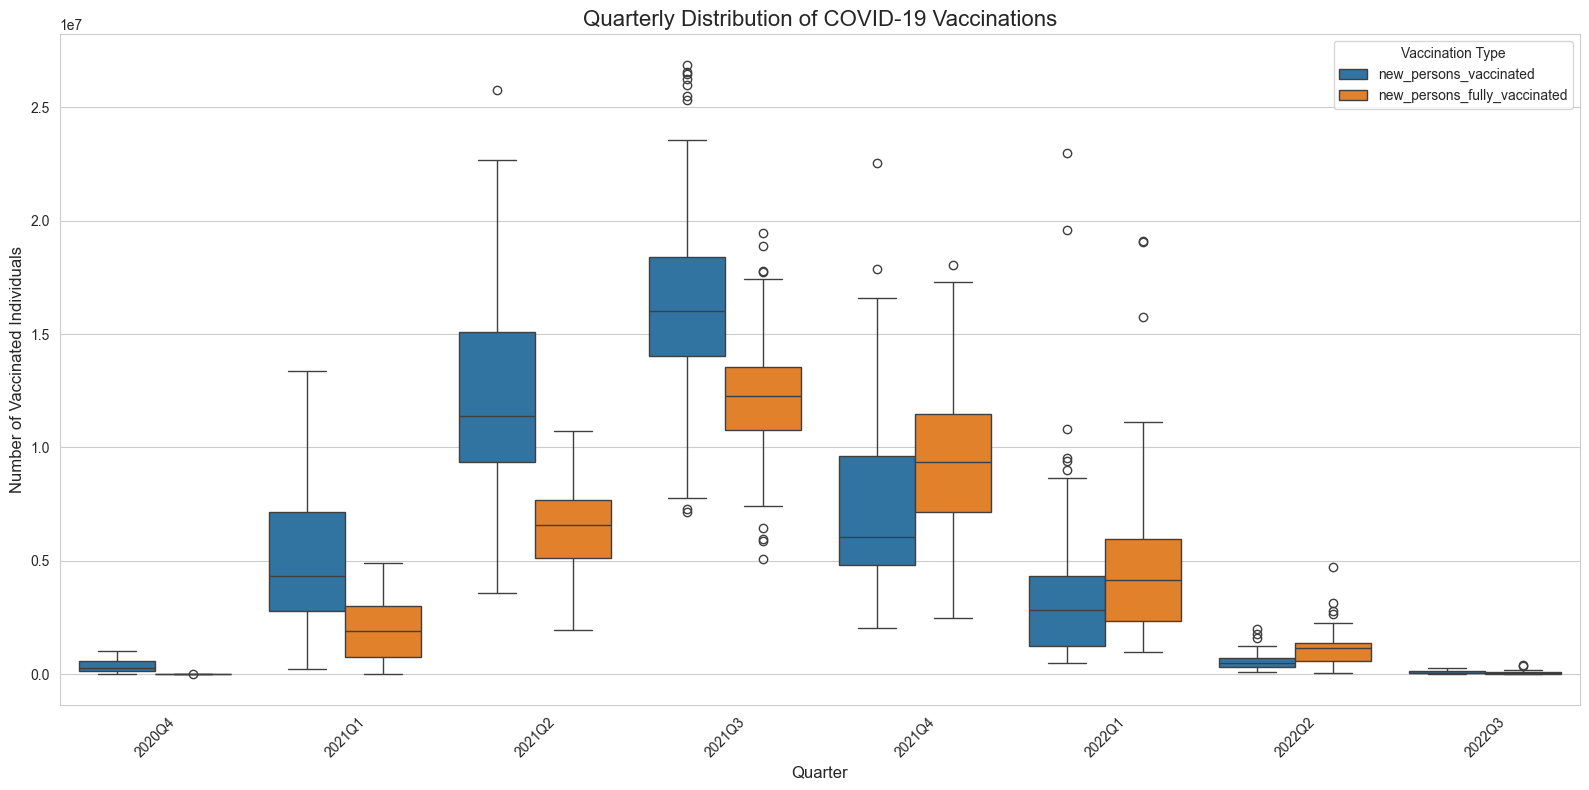

In [1060]:
vaccinated_df = df.groupby('date')['new_persons_vaccinated'].sum().reset_index()
fully_vaccinated_df = df.groupby('date')['new_persons_fully_vaccinated'].sum().reset_index()
vaccinated_merged_df = vaccinated_df.merge(fully_vaccinated_df, on='date')
vaccinated_merged_df['Q'] = vaccinated_merged_df['date'].dt.to_period('Q').astype(str)
vaccinated_melted_df = vaccinated_merged_df.melt(id_vars=['Q'], value_vars=['new_persons_vaccinated', 'new_persons_fully_vaccinated'], var_name='Category', value_name='Count')
vaccinated_melted_df
plt.figure(figsize=(16, 8))
sns.boxplot(x='Q', y='Count', hue='Category', data=vaccinated_melted_df)
plt.title('Quarterly Distribution of COVID-19 Vaccinations', fontsize=16)
plt.xlabel('Quarter', fontsize=12)
plt.ylabel('Number of Vaccinated Individuals', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Vaccination Type')
plt.tight_layout()
plt.show()

1.4. populacji



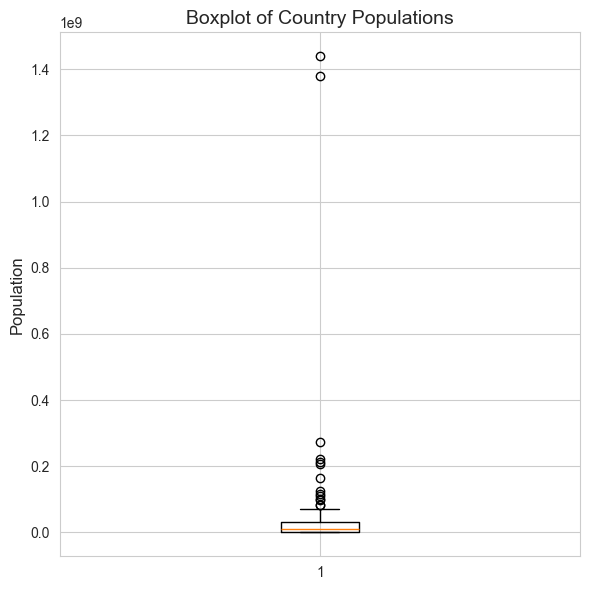

In [1061]:
plt.figure(figsize=(6, 6))
plt.boxplot(countries_df['population'])
plt.title('Boxplot of Country Populations', fontsize=14)
plt.ylabel('Population', fontsize=12)
plt.tight_layout()
plt.show()

1.5. PKB



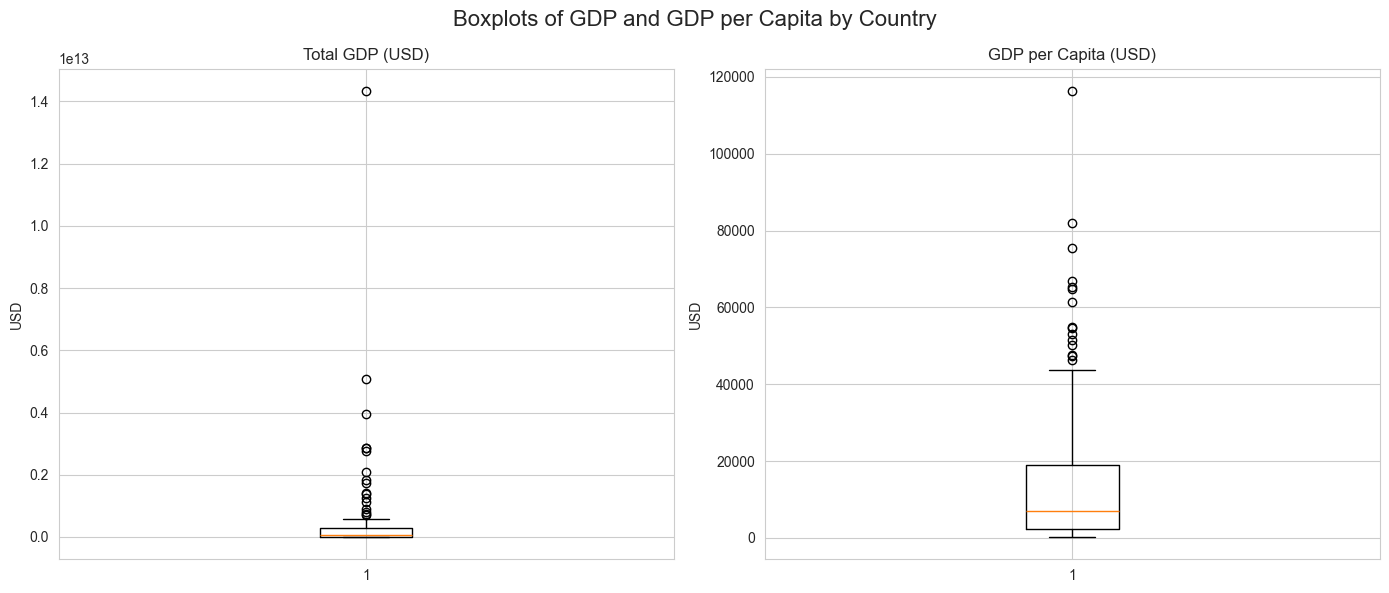

In [1062]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Boxplots of GDP and GDP per Capita by Country', fontsize=16)
ax[0].boxplot(countries_df['gdp_usd'])
ax[0].set_title('Total GDP (USD)', fontsize=12)
ax[0].set_ylabel('USD', fontsize=10)
ax[1].boxplot(countries_df['gdp_per_capita_usd'])
ax[1].set_title('GDP per Capita (USD)', fontsize=12)
ax[1].set_ylabel('USD', fontsize=10)
plt.tight_layout()
plt.show()

1.6.1 Wydatki na służbę zdrowia

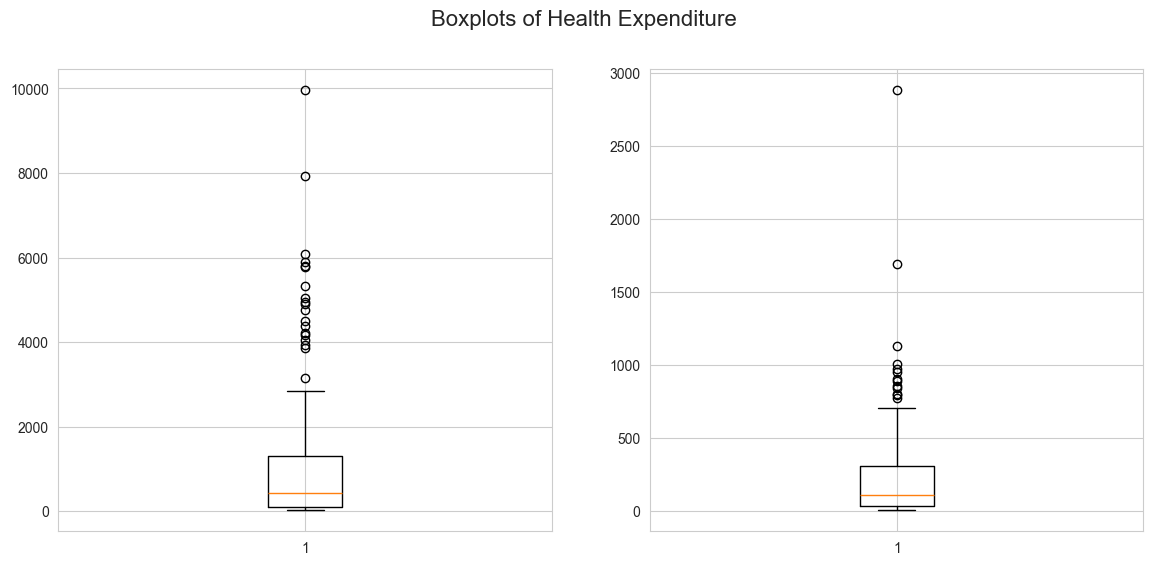

In [1063]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Boxplots of Health Expenditure', fontsize=16)

ax[0].boxplot(countries_df['health_expenditure_usd'])
ax[1].boxplot(countries_df['out_of_pocket_health_expenditure_usd'])
plt.show()

1.6.2 Zaaplikowane dawki szczepionek

D:\DevTools\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


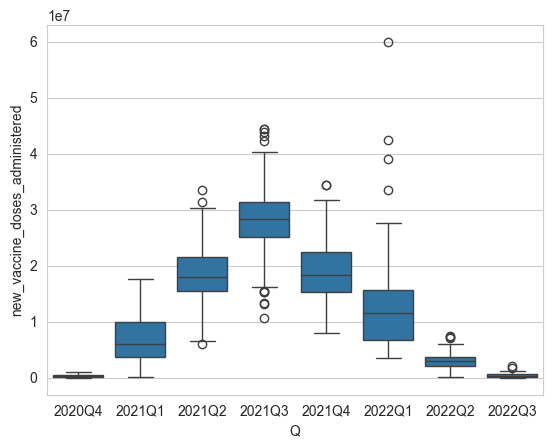

In [1064]:
administered_df = df.groupby('date')['new_vaccine_doses_administered'].sum().reset_index()
administered_df['Q'] = administered_df['date'].dt.to_period('Q').astype(str)
sns.boxplot(x='Q', y='new_vaccine_doses_administered', data=administered_df)
plt.show()

1.6.3 liczba nowych osób przetestowanych

D:\DevTools\Python\Python312\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


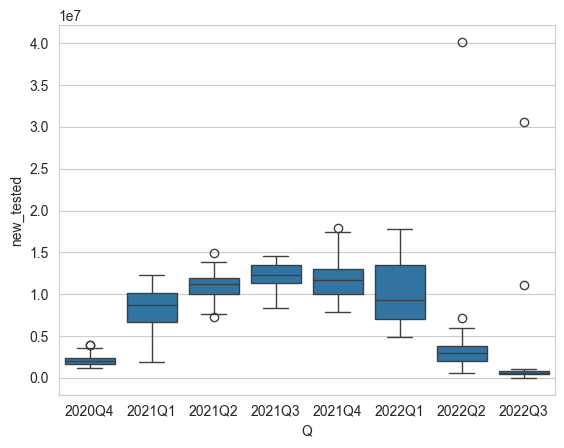

In [1065]:
tested_df = df.groupby('date')['new_tested'].sum().reset_index()
tested_df['Q'] = tested_df['date'].dt.to_period('Q').astype(str)
sns.boxplot(x='Q', y='new_tested', data=tested_df)
plt.show()

1.6.4 Gęstość zaludnienia

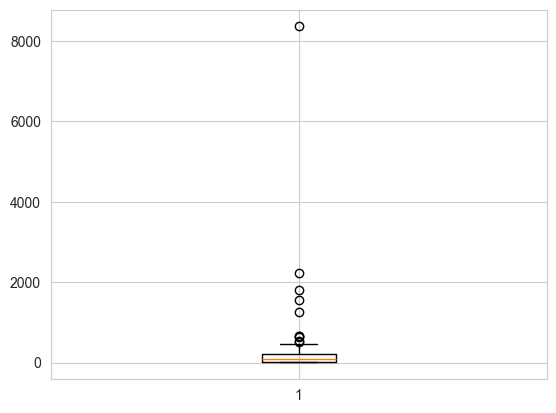

In [1066]:
plt.boxplot(countries_df['population_density_x'])
plt.show()

## Część 3

3.1. średnia liczba nowych zachorowań, śmierci i szczepień dla co najmniej 10 wybranych krajów w wybranym miesiącu

In [1067]:
month = 5
year = 2021

countries = ['Australia', 'Poland', 'United States of America', 'Belgium', 'Canada', 'Brazil', 'Japan', 'India', 'Azerbaijan', 'Morocco'] # ...
(
    df[
    (df['date'].dt.year == year) &
    (df['date'].dt.month == month) &
    (df['subregion1_code_x'].isna())
    & (df['country_name'].isin(countries))]
    .groupby(['country_name'])[['new_confirmed', 'new_deceased', 'new_persons_vaccinated', 'new_persons_fully_vaccinated']].mean()
)

,new_confirmed,new_deceased,new_persons_vaccinated,new_persons_fully_vaccinated
country_name,,,,
Australia,9.620690,0.000000,6.170855e+04,5.526655e+03
Azerbaijan,416.000000,11.555556,1.371930e+04,1.249430e+04
Belgium,2235.483871,22.322581,5.057097e+04,4.137661e+04
Brazil,60856.225806,1903.548387,4.872036e+05,2.131256e+05
Canada,4.741935,48.741935,5.956704e+05,6.368810e+04
India,284450.500000,3835.142857,1.425402e+06,5.691405e+05
Japan,4957.225806,90.935484,3.071305e+05,9.782477e+04
Morocco,301.200000,4.200000,1.810145e+05,6.040290e+04
Poland,3369.250000,309.250000,2.437248e+05,1.759185e+05


3.2. średnia zmiana liczby zachorowań, śmierci i szczepień dla co najmniej 10 wybranych krajów w wybranym miesiącu,

In [1068]:
avg_diff = df[
        (df['date'].dt.year == year) & 
        (df['date'].dt.month == month) &
        (df['subregion1_code_x'].isna()) &
        (df['country_name'].isin(countries))
    ].groupby(['country_name'])[['new_confirmed', 'new_deceased', 'new_persons_vaccinated']].diff()
avg_diff = avg_diff.groupby(df['country_name']).mean()
avg_diff.reset_index(inplace=True)
avg_diff

# a tez nw

,country_name,new_confirmed,new_deceased,new_persons_vaccinated
0,Australia,-0.285714,0.000000,-1315.321429
1,Azerbaijan,21.000000,0.269231,158.076923
2,Belgium,7.366667,-0.533333,-422.666667
3,Brazil,-317.533333,25.233333,-3057.533333
4,Canada,0.000000,0.000000,-1046.466667
5,India,-3092.925926,-21.370370,48256.259259
6,Japan,134.300000,0.333333,-8976.766667
7,Morocco,-4.052632,-0.157895,-6528.473684
8,Poland,-1448.333333,-86.666667,-5429.666667
9,United States of America,1101.034483,10.068966,11426.896552


3.3. mediana liczby nowych zachorowań, śmierci i szczepień dla co najmniej 10 wybranych krajów w wybranym miesiącu,


In [1069]:
(
    df[
        (df['date'].dt.year == year) & 
        (df['date'].dt.month == month) &
        (df['subregion1_code_x'].isna()) &
        (df['country_name'].isin(countries))
    ]
    .groupby(['location_key', 'country_name'])[['new_confirmed', 'new_deceased', 'new_persons_vaccinated', 'new_persons_fully_vaccinated']]
    .median()
    
)

,,new_confirmed,new_deceased,new_persons_vaccinated,new_persons_fully_vaccinated
location_key,country_name,,,,
AU,Australia,9.0,0.0,73133.0,3246.0
AZ,Azerbaijan,371.0,12.0,5391.0,11600.0
BE,Belgium,2409.0,19.0,53145.0,40610.0
BR,Brazil,72715.0,2202.0,568106.0,230915.0
CA,Canada,5.0,0.0,326726.0,28245.0
IN,India,293640.0,3883.0,1265122.5,341732.5
JP,Japan,5032.0,91.0,288041.0,67810.0
MA,Morocco,323.5,4.5,172435.5,33285.0
PL,Poland,2908.0,296.0,256736.5,183919.5


3.4. odchylenie standardowe liczby nowych zachorowań, śmierci i szczepień dla co najmniej 10 wybranych krajów w wybranym miesiącu,


In [1070]:
(
    df[
        (df['date'].dt.year == year) & 
        (df['date'].dt.month == month) &
        (df['subregion1_code_x'].isna()) &
        (df['country_name'].isin(countries))
    ]
    .groupby(['location_key', 'country_name'])[['new_confirmed', 'new_deceased', 'new_persons_vaccinated', 'new_persons_fully_vaccinated']]
    .std()
    
)

,,new_confirmed,new_deceased,new_persons_vaccinated,new_persons_fully_vaccinated
location_key,country_name,,,,
AU,Australia,4.601349,0.000000,30254.816963,9966.067057
AZ,Azerbaijan,278.332673,5.337338,14591.138145,7816.850452
BE,Belgium,1081.293018,9.961215,28056.674786,31940.771523
BR,Brazil,20478.573226,719.123858,224685.758795,111863.270131
CA,Canada,4.389136,113.495071,677343.717999,88551.421468
IN,India,92916.991458,403.585295,714035.145951,474647.278726
JP,Japan,1356.244882,35.363763,212944.429938,85824.972407
MA,Morocco,84.333673,2.307881,122851.470062,101595.683334
PL,Poland,2289.656070,158.373767,40317.753950,37799.045354


3.5. minimalna, średnia i maksymalna liczba nowych zachorowań, szczepień i śmierci, a PKB co najmniej 10 wybranych krajów,

In [1071]:
df = pd.read_csv('covid_combined_data.csv')
df['date'] = pd.to_datetime(df['date'])
df = df[(df['date'].dt.year == year) & 
        (df['date'].dt.month == month) &
        (df['subregion1_code_x'].isna()) &
        (df['country_name'].isin(countries))]

min_values = df.groupby(['country_name']).agg({'new_confirmed': 'min', 'new_persons_vaccinated': 'min', 'new_deceased': 'min'})
min_values = min_values.reset_index()
avg_values = df.groupby(['country_name']).agg({'new_confirmed': 'mean', 'new_persons_vaccinated': 'mean', 'new_deceased': 'mean'})
avg_values = avg_values.reset_index()
max_values = df.groupby(['country_name']).agg({'new_confirmed': 'max', 'new_persons_vaccinated': 'max', 'new_deceased': 'max'})
max_values = max_values.reset_index()

merged = min_values.merge(avg_values, on='country_name', suffixes=('_min', '_avg'))
merged = merged.merge(max_values, on='country_name')
merged = merged.rename(columns={
    'new_confirmed': 'new_confirmed_max',
    'new_persons_vaccinated': 'new_persons_vaccinated_max',
    'new_deceased': 'new_deceased_max'
})

countries_df = pd.read_csv('countries_data.csv')
merged = merged.merge(countries_df[['country_name', 'gdp_usd']], on='country_name')


metrics = ['new_confirmed', 'new_persons_vaccinated', 'new_deceased']
titles = ['New Confirmed Cases', 'New Vaccinations', 'New Deaths']
colors = ['red', 'green', 'blue']

       location_key subregion1_code_x subregion1_name_x       date  \
187430           US               NaN               NaN 2021-05-29   
187513           AZ               NaN               NaN 2021-05-31   
192491           JP               NaN               NaN 2021-05-31   
192709           AU               NaN               NaN 2021-05-29   
192720           BR               NaN               NaN 2021-05-22   
...             ...               ...               ...        ...   
230699           AZ               NaN               NaN 2021-05-26   
230745           JP               NaN               NaN 2021-05-19   
230819           BE               NaN               NaN 2021-05-06   
231117           AZ               NaN               NaN 2021-05-06   
231457           AU               NaN               NaN 2021-05-14   

                  country_name_x  new_confirmed  cumulative_confirmed  \
187430  United States of America          15334              32123961   
187513       

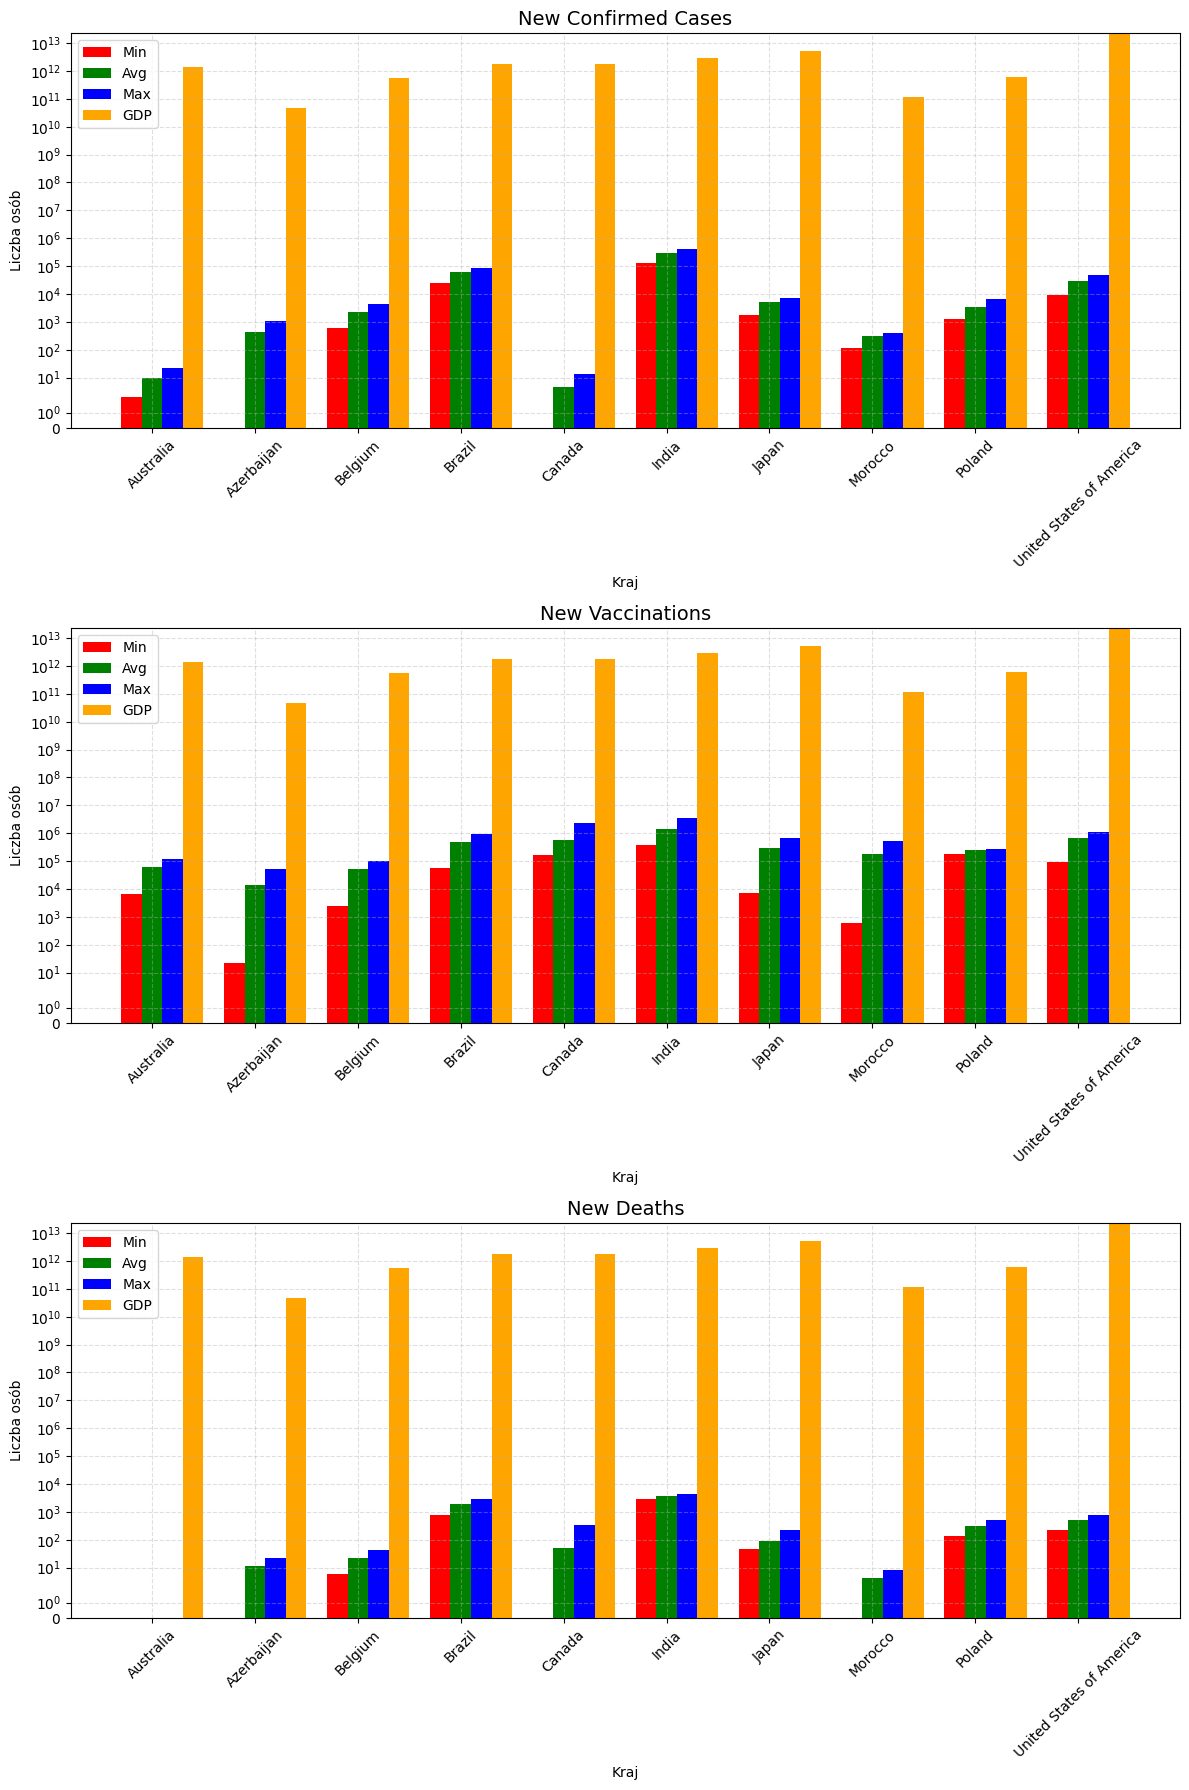

In [1072]:
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

x = np.arange(len(merged))
width = 0.2

for i, metric in enumerate(metrics):
    ax = axes[i]

    ax.bar(x - width, merged[f'{metric}_min'], width=width, label='Min', color=colors[0])
    ax.bar(x,        merged[f'{metric}_avg'], width=width, label='Avg', color=colors[1])
    ax.bar(x + width, merged[f'{metric}_max'], width=width, label='Max', color=colors[2])
    ax.bar(x + 2 * width, merged['gdp_usd'],  width=width, label="GDP", color='orange')

    ax.set_title(titles[i], fontsize=14)
    ax.set_ylabel('Liczba osób')
    ax.set_xlabel('Kraj')
    ax.set_xticks(x)
    ax.set_xticklabels(merged['country_name'], rotation=45)
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.4)
    ax.set_yscale('symlog')


plt.tight_layout()
plt.show()

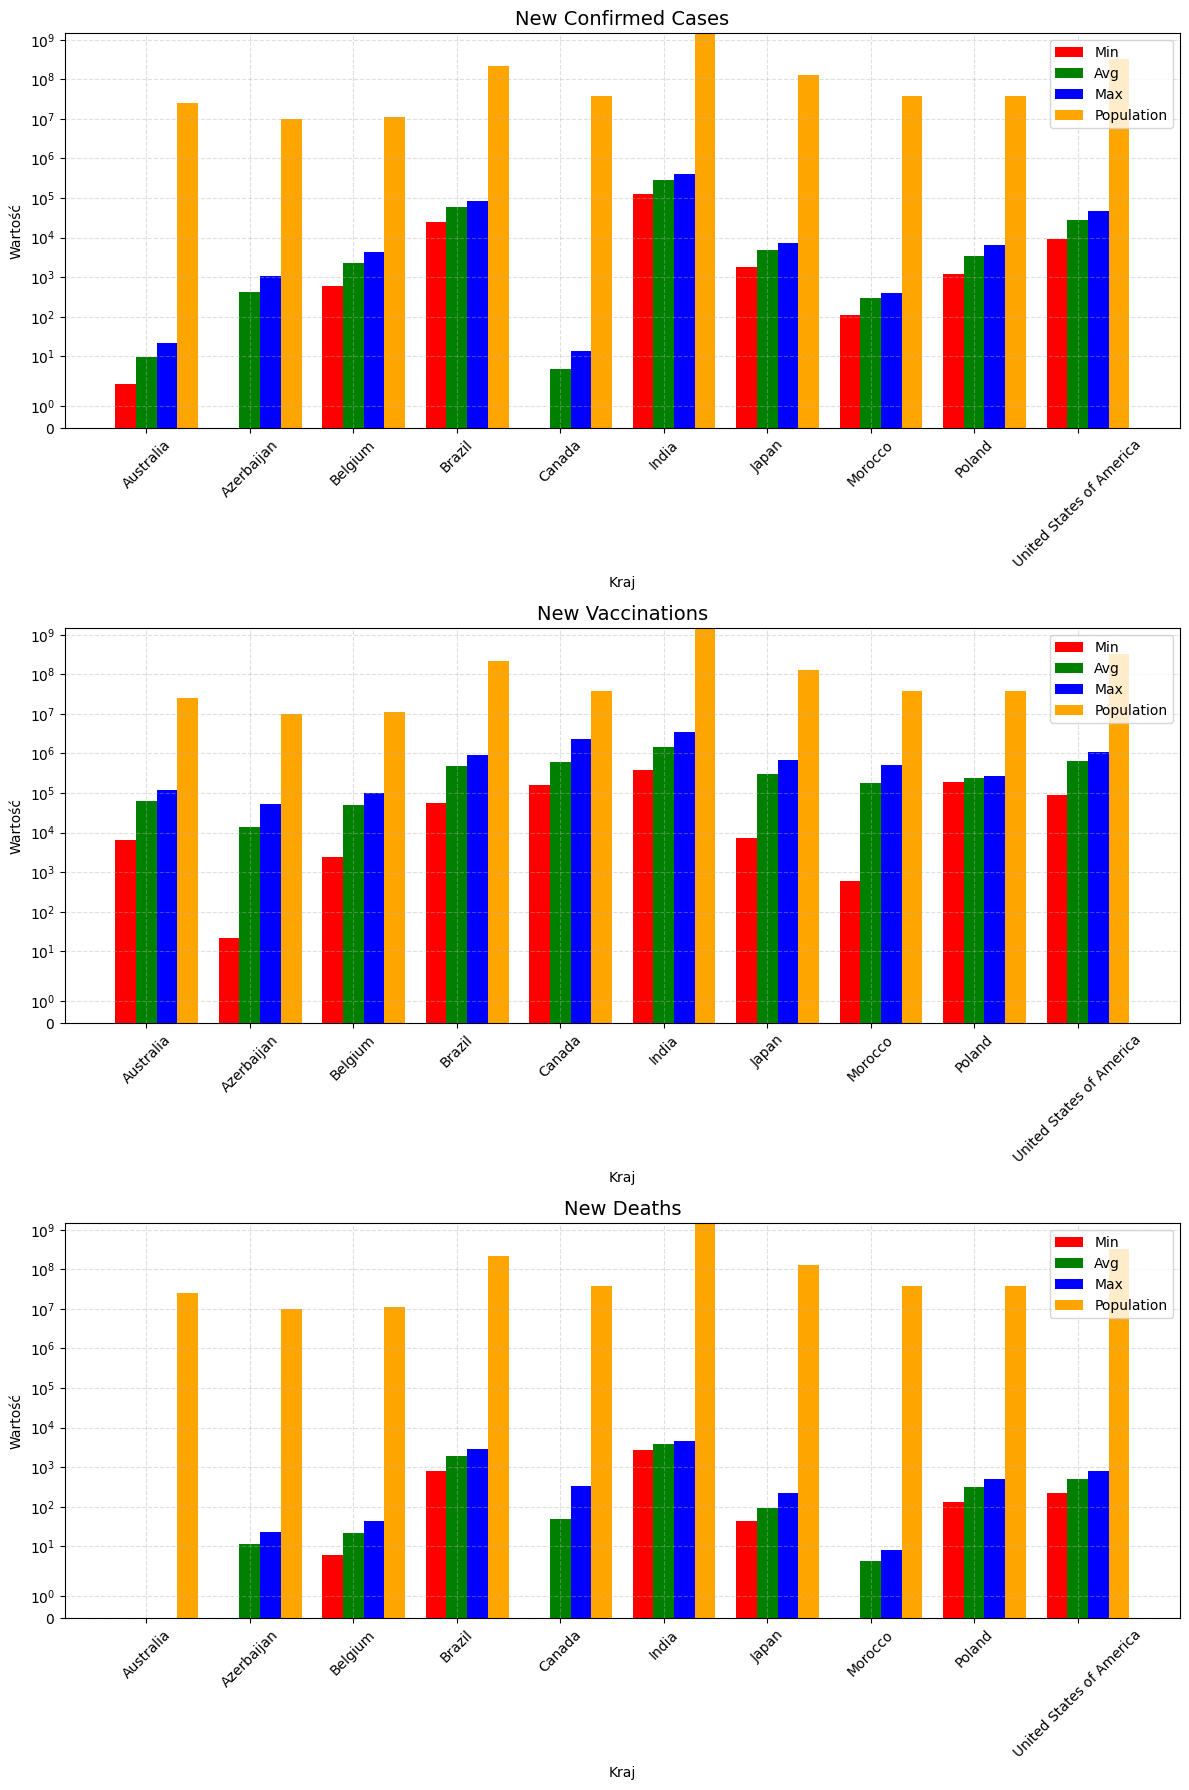

In [1073]:
merged = merged.merge(countries_df[['country_name', 'population']], on='country_name')

fig, axes = plt.subplots(3, 1, figsize=(12, 18))

for i, metric in enumerate(metrics):
    ax = axes[i]

    ax.bar(x - width, merged[f'{metric}_min'], width=width, label='Min', color=colors[0])
    ax.bar(x,        merged[f'{metric}_avg'], width=width, label='Avg', color=colors[1])
    ax.bar(x + width, merged[f'{metric}_max'], width=width, label='Max', color=colors[2])
    ax.bar(x + 2 * width, merged['population'],  width=width, label="Population", color='orange')

    ax.set_title(titles[i], fontsize=14)
    ax.set_ylabel('Wartość')
    ax.set_xlabel('Kraj')
    ax.set_xticks(x)
    ax.set_xticklabels(merged['country_name'], rotation=45)
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.4)
    ax.set_yscale('symlog')


plt.tight_layout()
plt.show()

In [1074]:
## Część 4
merged

,country_name,new_confirmed_min,new_persons_vaccinated_min,new_deceased_min,new_confirmed_avg,new_persons_vaccinated_avg,new_deceased_avg,new_confirmed_max,new_persons_vaccinated_max,new_deceased_max,gdp_usd,population
0,Australia,2,6341,0,9.620690,6.170855e+04,0.000000,22,116905,0,1392680589329,25499881
1,Azerbaijan,0,22,0,416.000000,1.371930e+04,11.555556,1080,53155,23,48047647058,10139175
2,Belgium,603,2417,6,2235.483871,5.057097e+04,22.322581,4331,99944,43,542587364000,11455519
3,Brazil,24619,56407,786,60856.225806,4.872036e+05,1903.548387,85536,933224,2966,1839758040765,212559409
4,Canada,0,162069,0,4.741935,5.956704e+05,48.741935,14,2368272,335,1736425629519,37742157
5,India,127510,375181,2795,284450.500000,1.425402e+06,3835.142857,414188,3553142,4529,2875142314811,1380004385
6,Japan,1785,7455,45,4957.225806,3.071305e+05,90.935484,7244,675188,228,5081769542379,126476458
7,Morocco,112,597,0,301.200000,1.810145e+05,4.200000,397,505967,8,118725279596,36910558
8,Poland,1230,185016,135,3369.250000,2.437248e+05,309.250000,6431,276410,510,585705873800,37972812
9,United States of America,9167,89146,219,28643.966667,6.532740e+05,511.300000,47264,1094704,787,21374418877706,331002647


In [1075]:
total_values = df.groupby('country_name').agg({
    'new_confirmed': 'sum',
    'new_persons_vaccinated': 'sum',
    'new_deceased': 'sum'
}).reset_index()
total_values = total_values.merge(countries_df[['country_name', 'population', 'gdp_usd']], on='country_name')


Normalizacja na 1000 osób

In [1076]:
merged['cases_per_1000'] = merged['new_confirmed_avg'] / merged['population'] * 1000
merged['vaccinations_per_1000'] = merged['new_persons_vaccinated_avg'] / merged['population'] * 1000
merged['deaths_per_1000'] = merged['new_deceased_avg'] / merged['population'] * 1000


avg_values_covid_data = df.groupby(['country_name']).agg({'new_vaccine_doses_administered': 'mean', 'new_persons_fully_vaccinated': 'mean'})
avg_values_covid_data = avg_values_covid_data.reset_index()
avg_values_countries_data = countries_df[countries_df.country_name.isin(countries)].groupby(['country_name']).agg({'health_expenditure_usd': 'mean', 'out_of_pocket_health_expenditure_usd': 'mean'})
avg_values_countries_data = avg_values_countries_data.reset_index()
avg_values_covid_data #TODO: te z countries trzeba dać x1000 bo one są już per capita i dać rename, te z covid trzeba policzyć normalnie
#TODO: dodatkowe przypadki
# doses administered per 1000, fully vaccinated per 1000, health expenditure per 1000, out of pocket health expenditure per 1000

,country_name,new_vaccine_doses_administered,new_persons_fully_vaccinated
0,Australia,6.723521e+04,5.526655e+03
1,Azerbaijan,2.621359e+04,1.249430e+04
2,Belgium,9.194758e+04,4.137661e+04
3,Brazil,7.003292e+05,2.131256e+05
4,Canada,6.593631e+05,6.368810e+04
5,India,1.994543e+06,5.691405e+05
6,Japan,4.049552e+05,9.782477e+04
7,Morocco,2.414174e+05,6.040290e+04
8,Poland,4.196435e+05,1.759185e+05
9,United States of America,1.627800e+06,1.132099e+06


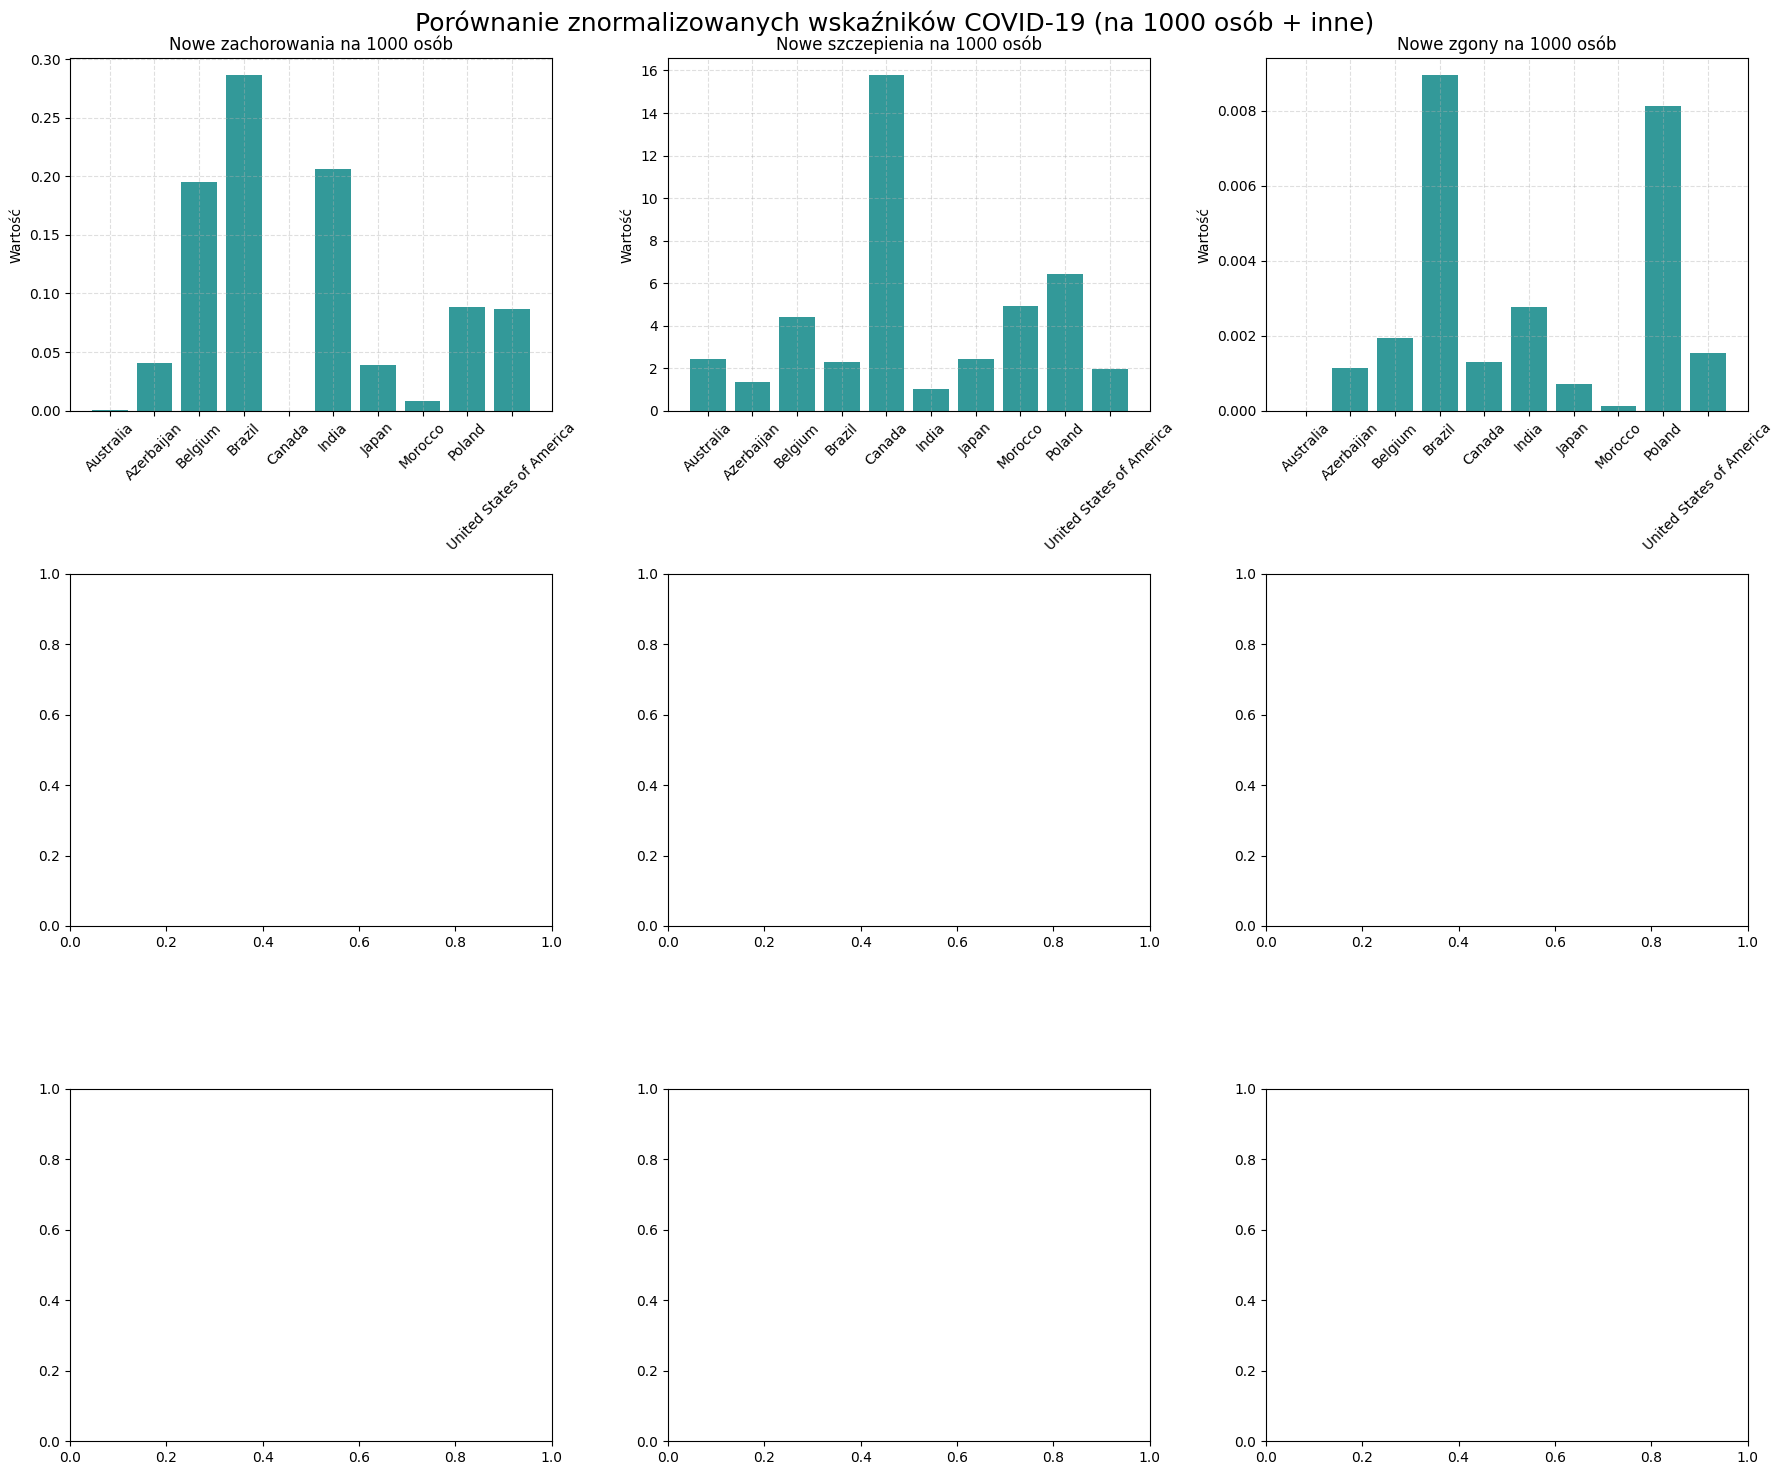

In [1077]:
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
fig.suptitle('Porównanie znormalizowanych wskaźników COVID-19 (na 1000 osób + inne)', fontsize=18)

# Lista metryk i tytułów
indicators = [
    ('cases_per_1000', 'Nowe zachorowania na 1000 osób'),
    ('vaccinations_per_1000', 'Nowe szczepienia na 1000 osób'),
    ('deaths_per_1000', 'Nowe zgony na 1000 osób'),
]

# Wykresy
for idx, (col, title) in enumerate(indicators):
    row, col_pos = divmod(idx, 3)
    ax = axes[row, col_pos]
    
    if col in merged.columns:
        data = merged

    countries = data['country_name']
    values = data[col]
    
    ax.bar(countries, values, color='teal', alpha=0.8)
    ax.set_title(title)
    ax.set_ylabel('Wartość')
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True, linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()
#TODO: Poprawić bo to sprawka wiadomego narzędzia